In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('MVR.csv')

In [ ]:
df.head()

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
0,2008-06-02,30.926001,32.000000,30.257000,32.000000,29.529486,50620000,21.552500,21.737499,21.150000,21.517500,19.202324,36856000
1,2008-06-03,31.386999,31.399000,30.235001,30.740000,28.366755,93913000,21.752501,21.987499,21.507500,21.889999,19.534735,48411600
2,2008-06-04,30.745001,30.959999,29.454000,29.740000,27.443956,66160000,21.770000,22.025000,21.320000,21.370001,19.070698,40684400
3,2008-06-05,29.951000,30.615999,29.544001,30.615999,28.252338,45959000,21.615000,21.809999,21.397499,21.809999,19.463354,27059600
4,2008-06-06,30.228001,30.242001,29.481001,29.573000,27.289856,29383000,21.475000,21.497499,20.887501,20.912500,18.662413,41748000


## **Information About the Data**
.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4047 non-null   object 
 1   Open_M       4047 non-null   float64
 2   High_M       4047 non-null   float64
 3   Low_M        4047 non-null   float64
 4   Close_M      4047 non-null   float64
 5   Adj Close_M  4047 non-null   float64
 6   Volume_M     4047 non-null   int64  
 7   Open_V       4047 non-null   float64
 8   High_V       4047 non-null   float64
 9   Low_V        4047 non-null   float64
 10  Close_V      4047 non-null   float64
 11  Adj Close_V  4047 non-null   float64
 12  Volume_V     4047 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 411.1+ KB


## **Descriptive Statistics about the Data¶**

.describe() generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [ ]:
df.describe()

,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
count,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03
mean,164.535600,166.170139,162.857876,164.563858,160.646182,8.249296e+06,107.988356,108.965956,106.999128,108.003625,104.551613,1.386969e+07
std,138.620480,139.946015,137.248286,138.635551,138.057771,1.140882e+07,82.319225,83.020901,81.600647,82.319975,81.900950,1.469735e+07
min,12.100000,12.736000,11.305000,11.918000,11.024753,6.411000e+05,10.672500,11.047500,10.445000,10.605000,9.496159,1.640900e+06
25%,42.459502,42.865499,42.062000,42.452500,39.624086,2.988750e+06,30.157500,30.582501,29.888750,30.253750,27.724516,6.652450e+06
50%,97.440002,98.089996,96.699997,97.599998,92.752449,4.409000e+06,78.690002,79.349998,78.150002,78.620003,74.387733,9.420400e+06
75%,304.414994,306.979995,300.304993,303.910004,297.765701,8.251500e+06,193.044998,195.095001,190.185005,192.940002,187.882408,1.526840e+07
max,488.529999,490.000000,483.640015,488.640015,487.964142,1.787220e+08,290.000000,290.959991,287.899994,290.369995,289.833618,3.375336e+08


In [ ]:
from datetime import datetime
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


## Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

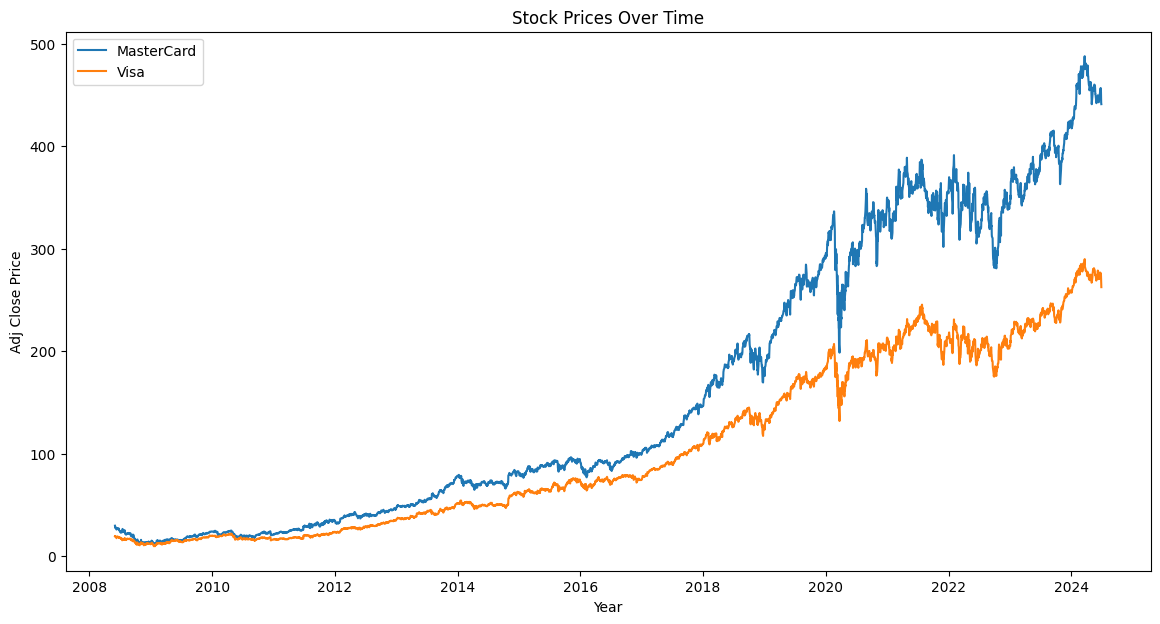

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Adj Close_M'], label='MasterCard')
plt.plot(df['Date'], df['Adj Close_V'], label='Visa')
plt.title('Stock Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

## Volume of Sales¶
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

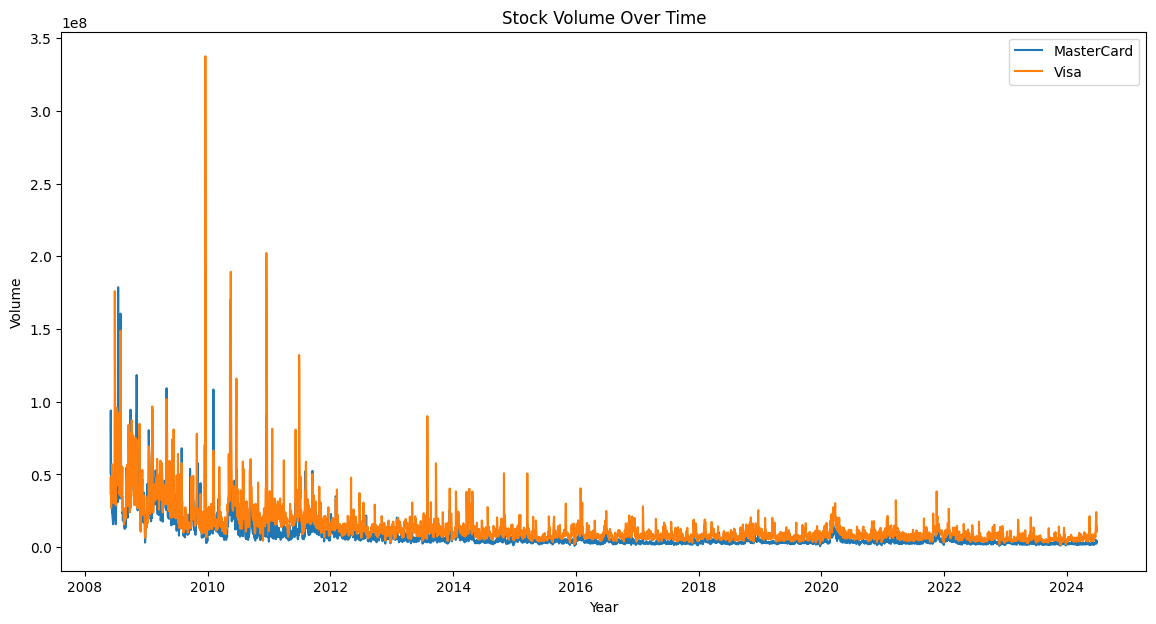

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volume_M'], label='MasterCard')
plt.plot(df['Date'], df['Volume_V'], label='Visa')
plt.title('Stock Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.show()

# 1. What was the moving average of the stocks?¶


The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

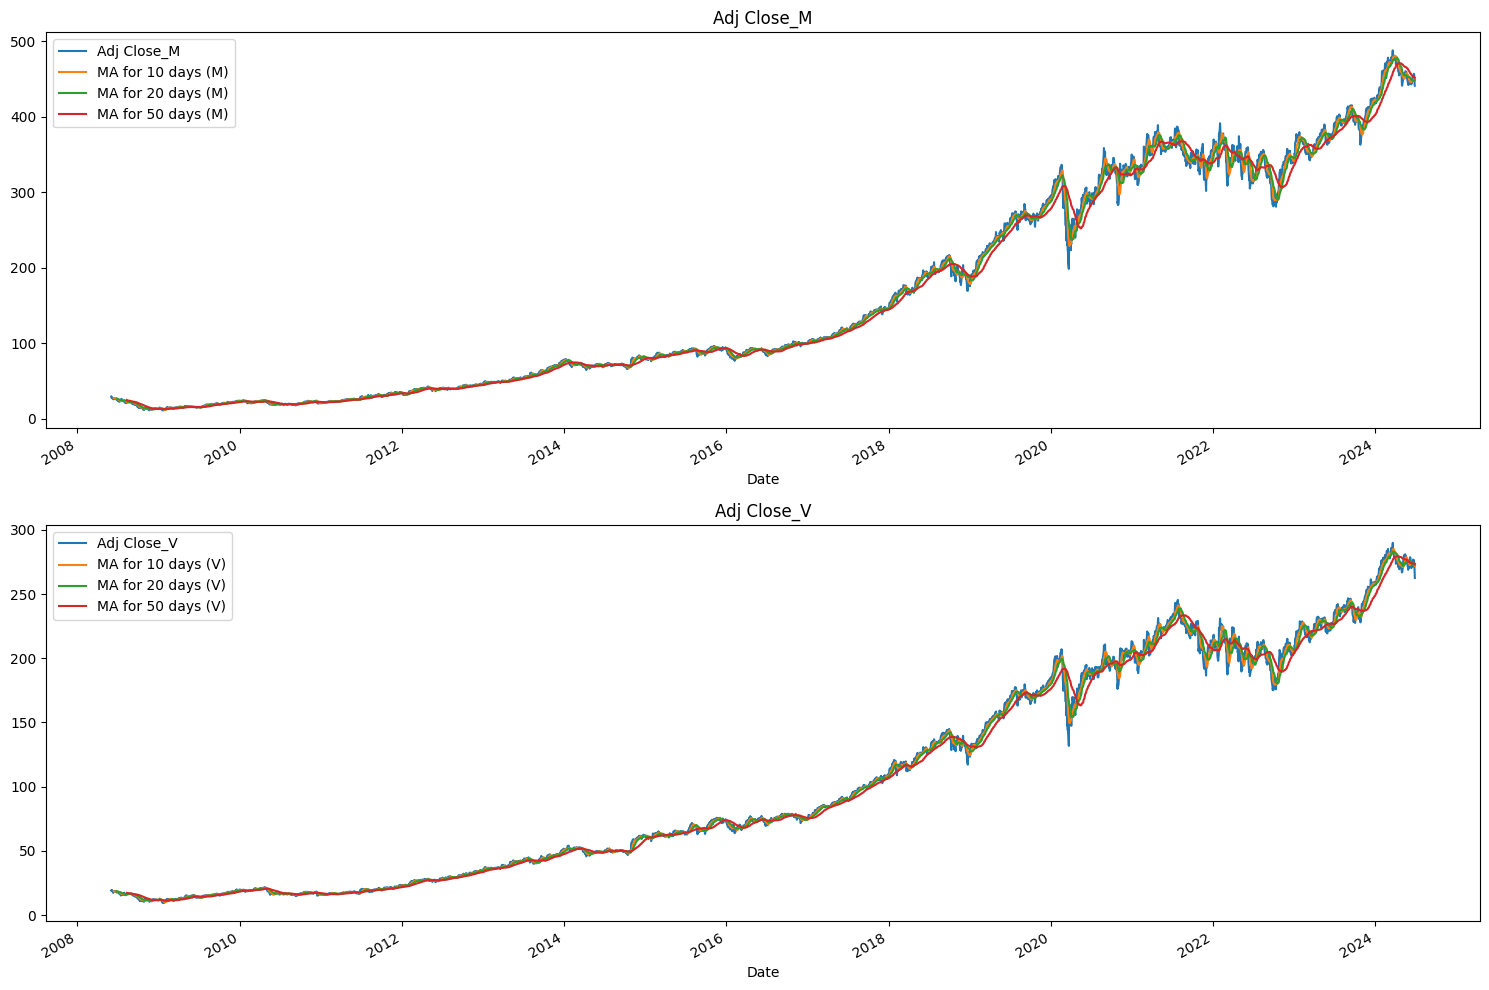

In [ ]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

ma_day = [10, 20, 50]


# Calculate moving averages for both 'Adj Close_M' and 'Adj Close_V'
for ma in ma_day:
    df[f'MA for {ma} days (M)'] = df['Adj Close_M'].rolling(ma).mean()
    df[f'MA for {ma} days (V)'] = df['Adj Close_V'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)

df[['Adj Close_M', 'MA for 10 days (M)', 'MA for 20 days (M)', 'MA for 50 days (M)']].plot(ax=axes[0])
axes[0].set_title('Adj Close_M')

df[['Adj Close_V', 'MA for 10 days (V)', 'MA for 20 days (V)', 'MA for 50 days (V)']].plot(ax=axes[1])
axes[1].set_title('Adj Close_V')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## 2. What was the daily return of the stock on average?¶


Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

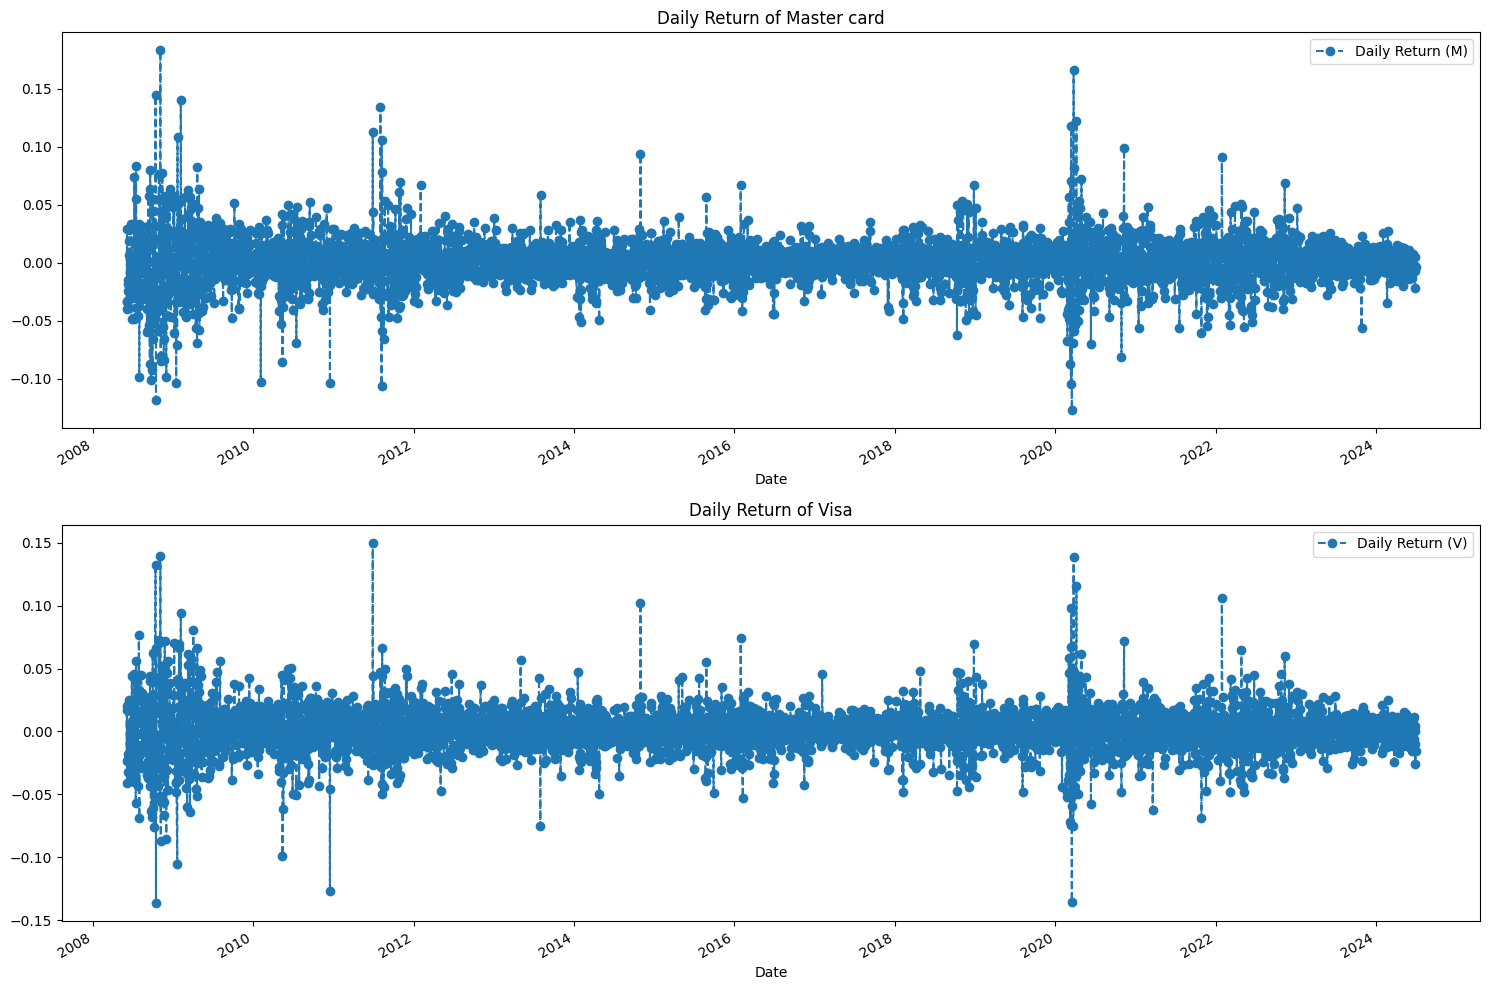

In [ ]:
df['Daily Return (M)'] = df['Adj Close_M'].pct_change()
df['Daily Return (V)'] = df['Adj Close_V'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)

df['Daily Return (M)'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('Daily Return of Master card')

df['Daily Return (V)'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('Daily Return of Visa')


fig.tight_layout()

Text(0.5, 1.0, 'Daily Return of Visa')

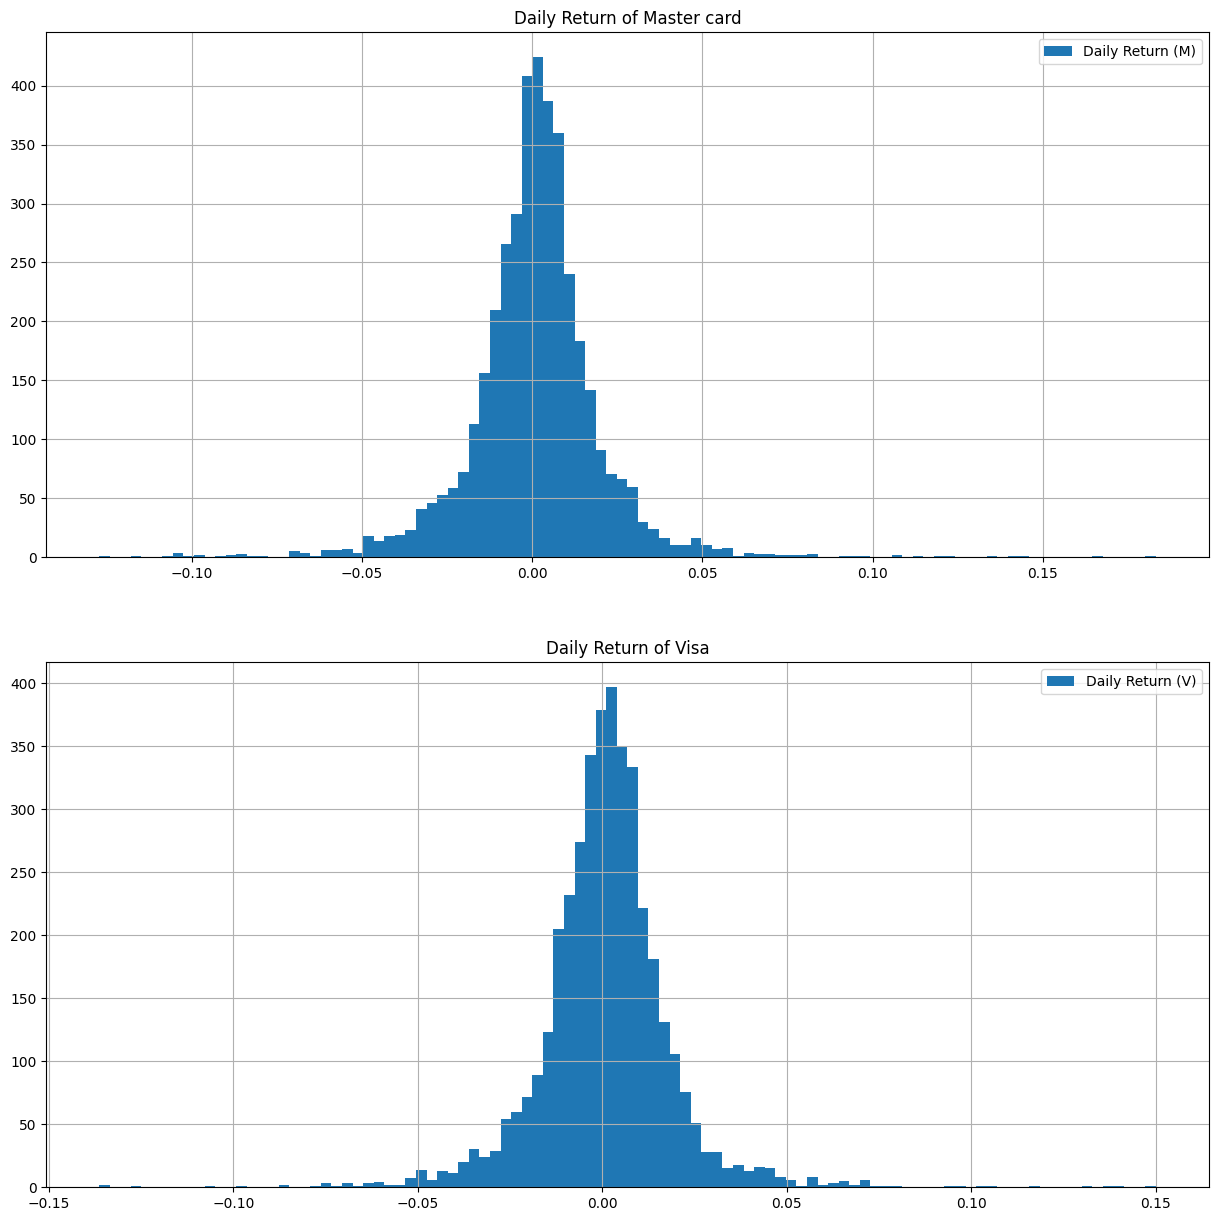

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(15)
fig.set_figwidth(15)

df['Daily Return (M)'].hist(bins=100, ax=axes[0], legend=True)
axes[0].set_title('Daily Return of Master card')


df['Daily Return (V)'].hist(bins=100, ax=axes[1], legend=True)
axes[1].set_title('Daily Return of Visa')

# 3. What was the correlation between closing prices?¶


Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.



In [ ]:
closing_list = ['Adj Close_M','Adj Close_V']
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = df[closing_list]

closing_df.head()

,Adj Close_M,Adj Close_V
Date,,
2008-06-02,29.529486,19.202324
2008-06-03,28.366755,19.534735
2008-06-04,27.443956,19.070698
2008-06-05,28.252338,19.463354
2008-06-06,27.289856,18.662413


In [ ]:
# do corelation between closing list
closing_df.corr()

,Adj Close_M,Adj Close_V
Adj Close_M,1.000000,0.996745
Adj Close_V,0.996745,1.000000


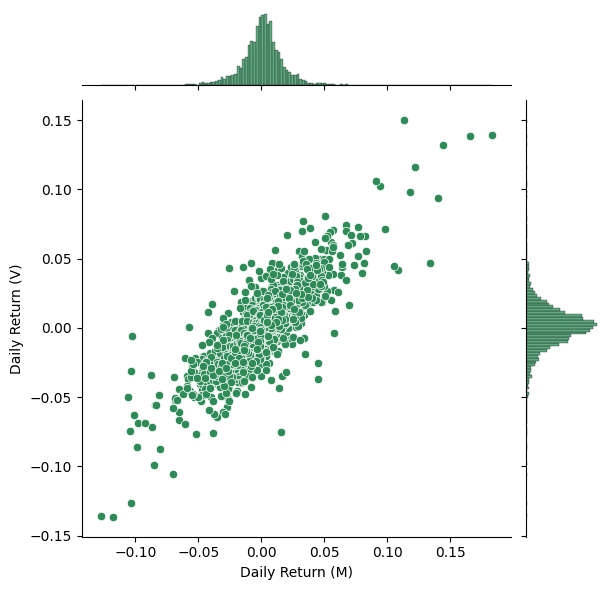

In [ ]:
# We'll use joinplot to compare the daily returns of Mastercard and Visa
sns.jointplot(x='Daily Return (M)', y='Daily Return (V)', data=df, kind='scatter', color = 'seagreen')

As we can see there is alomost a linear corelation between Mastercard and visa stock's closing price.

In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,Adj Close_M,Adj Close_V
Date,,
2008-06-02,NaN,NaN
2008-06-03,-0.039375,0.017311
2008-06-04,-0.032531,-0.023754
2008-06-05,0.029456,0.020589
2008-06-06,-0.034067,-0.041151


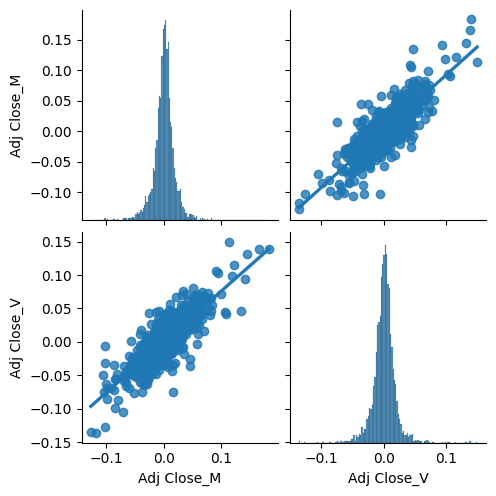

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
fig
sns.pairplot(tech_rets, kind='reg')

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

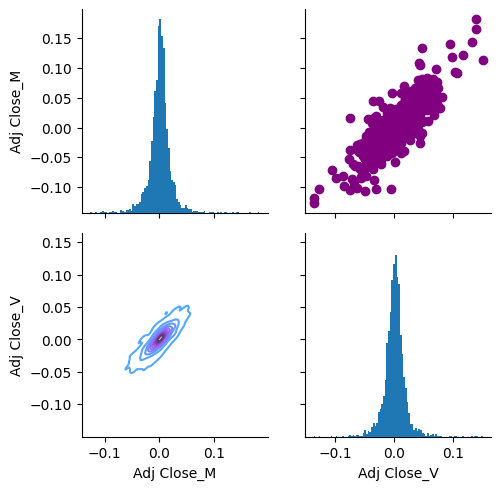

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=100)

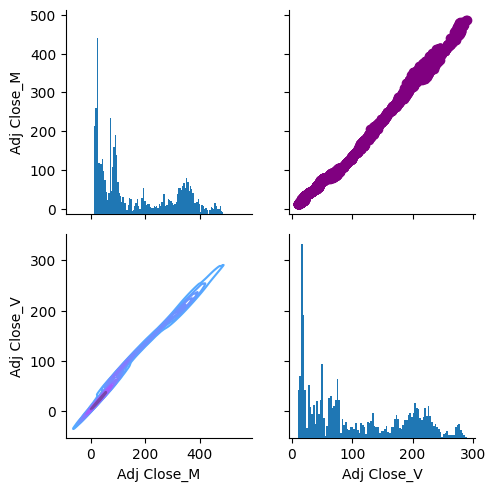

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=100)

Text(0.5, 1.0, 'Correlation of stock return')

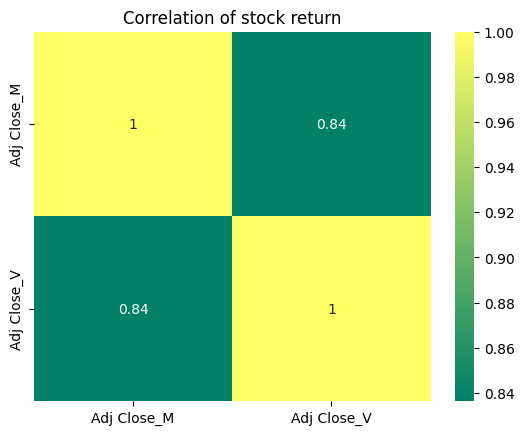

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

# 4. Predicting the closing price stock price of Mastercard and Visa:¶

In [ ]:
# predicting the closing price for both
# create a dataframe with close_M and and Close_V column
closed_list = ['Close_M', 'Close_V']

closed_df = df[closed_list]
closed_df.head()

,Close_M,Close_V
0,32.000000,21.517500
1,30.740000,21.889999
2,29.740000,21.370001
3,30.615999,21.809999
4,29.573000,20.912500


<Axes: xlabel='Date'>

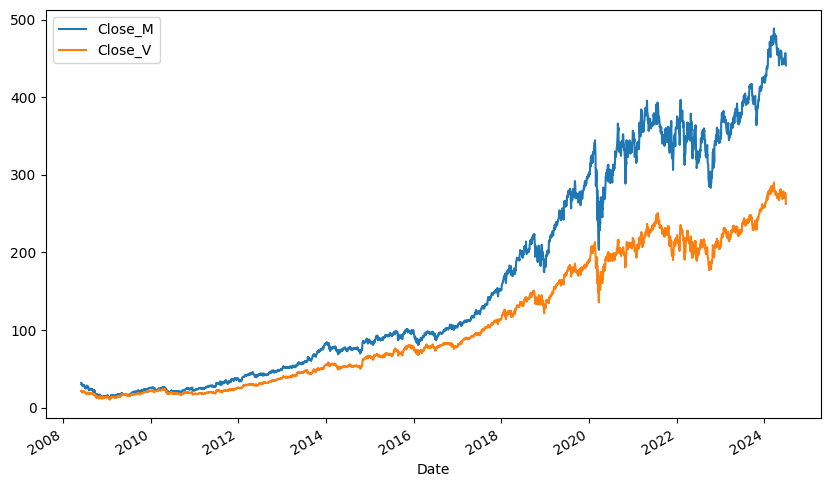

In [ ]:
# remove date from index and create Date column
df.reset_index(inplace=True)
# plot the closing price for both over time
df.plot(x='Date', y=['Close_M', 'Close_V'], figsize=(10, 6))

In [ ]:
# conver the dataframe to a numpy array
dataset = closed_df.values

# Get the number of rows to train the model
training_data_len = int(np.ceil(len(dataset) * .80))

training_data_len

3238

In [ ]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04212518, 0.03900595],
       [0.03948213, 0.04033742],
       [0.03738447, 0.03847873],
       ...,
       [0.92393888, 0.94005687],
       [0.90373842, 0.91500009],
       [0.90040315, 0.90027346]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# split the data into x_train y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04212518, 0.03948213, 0.03738447, 0.03922202, 0.03703416,
       0.03612587, 0.03500363, 0.03356883, 0.03465752, 0.03634823,
       0.03676986, 0.03629579, 0.03648038, 0.03637759, 0.0345757 ,
       0.03426316, 0.03381216, 0.03578815, 0.03283884, 0.03199769,
       0.03069713, 0.03024194, 0.02859318, 0.0282261 , 0.02662348,
       0.03043073, 0.02770378, 0.02811282, 0.02898335, 0.02901481,
       0.02751918, 0.03188861, 0.03499314, 0.03391494, 0.03119638,
       0.03244448, 0.03184665, 0.02922038, 0.0302839 , 0.0282177 ,
       0.02997973, 0.03179001, 0.02621444, 0.02477125, 0.02343923,
       0.02473769, 0.02366579, 0.02219742, 0.02369305, 0.02432654,
       0.02343923, 0.02398043, 0.02447967, 0.02512366, 0.0249055 ,
       0.02504395, 0.02604034, 0.02560821, 0.02568793, 0.02412727])]
[0.024662169209869616]

[array([0.04212518, 0.03948213, 0.03738447, 0.03922202, 0.03703416,
       0.03612587, 0.03500363, 0.03356883, 0.03465752, 0.03634823,
       0.03676986, 0.03629579, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3178/3178 [==============================] - 205s 63ms/step - loss: 7.7693e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # y_test should have the original shape for inverse scaling
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0]) # Extract the first feature for prediction

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)

# Inverse transform needs to match the number of features used during scaling
# Assuming you only want to predict and inverse scale the first feature
predictions_reshaped = np.zeros((predictions.shape[0], 2))
predictions_reshaped[:, 0] = predictions[:, 0] # Put predictions in the first column
predictions_inverse = scaler.inverse_transform(predictions_reshaped)[:, 0] # Inverse and extract the first column

# Get the root mean squared error (RMSE) for the first feature
rmse = np.sqrt(np.mean(((predictions_inverse - y_test[:, 0]) ** 2))) # Calculate RMSE for the first feature
rmse

26/26 [==============================] - 3s 75ms/step


8.891167688213889

<ipython-input-45-0f74ee27e959>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_inverse


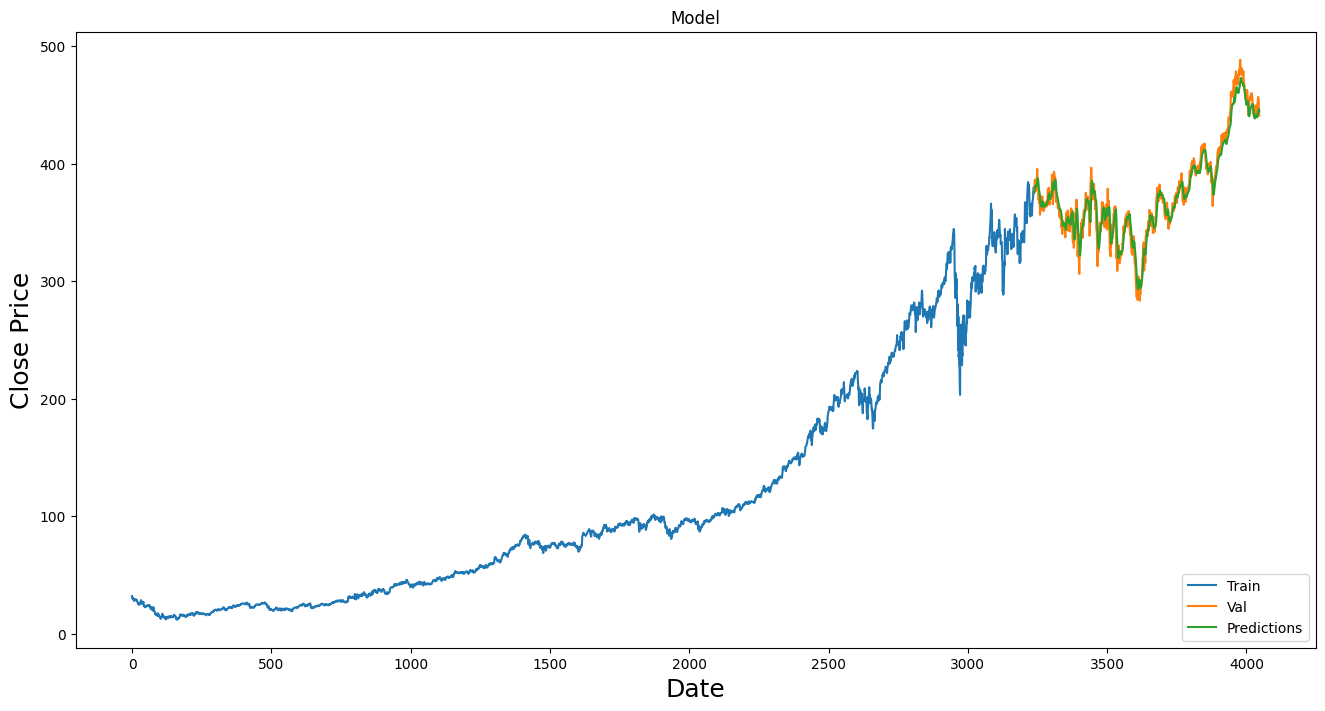

In [ ]:
# plot the data
train = closed_df[:training_data_len]
valid = closed_df[training_data_len:]
valid['Predictions'] = predictions_inverse

# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close_M'])
plt.plot(valid[['Close_M', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close_M,Close_V,Predictions
3238,378.130005,221.020004,375.036181
3239,378.320007,221.979996,376.407396
3240,386.489990,226.279999,377.160986
3241,386.170013,226.410004,379.031109
3242,382.160004,225.789993,380.830905
...,...,...,...
4042,456.959991,276.299988,443.425601
4043,455.649994,273.529999,445.215708
4044,452.380005,273.600006,446.448287
4045,442.750000,266.589996,446.635456


Do you have any questions? Ask your questions in the comments below and I will do my best to answer.

References: https://www.investopedia.com/terms/c/correlation.asp Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization